# Einführung in Autoencoder

- Beispiel eines sehr einfach Autoencoders mit einem Conv2D-Layer, der die Daten nur "durchschleust"

## Einlesen der MNIST-Daten

In [5]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
X_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

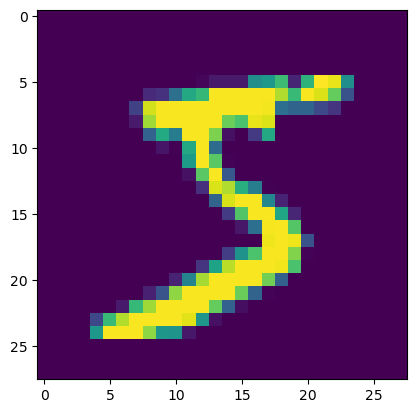

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

Preprocessing der Daten (Normalisierung [0,1])

In [13]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(60000, 28, 28)

## Modelldefinition

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3), padding="same", input_shape=(28, 28, 1)))

model.compile(optimizer="rmsprop", loss="mse")

/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Modelltraining

In [10]:
model.fit(X_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - loss: 0.0055
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - loss: 2.1890e-06
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - loss: 2.1916e-06
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - loss: 2.1905e-06
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - loss: 2.1890e-06
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 2.1926e-06
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - loss: 2.1912e-06
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 2.1962e-06
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - loss: 2.1904e-06
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - loss: 2.1902e-06


## Visualisierung der Ergebnisse

In [11]:
image = X_train[0]

image_predicted = model.predict(image.reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


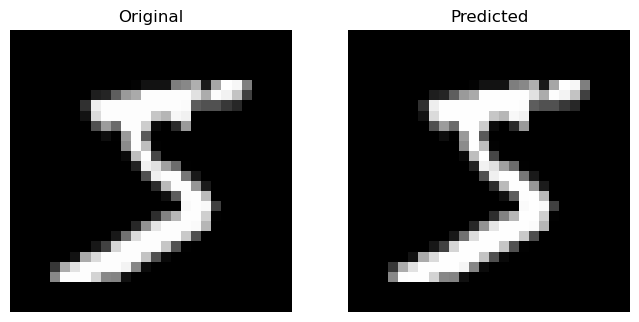

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(image.reshape(28, 28), cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(image_predicted.reshape(28, 28), cmap='gray')
axs[1].set_title('Predicted')
axs[1].axis('off')
plt.show()